In [45]:
import numpy as np

np.empty([1], dtype=int)
state = np.zeros([24], dtype=int)
state[2] = 1
state
# np.argmax(state)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [7]:
from random import randint
randint(0, 3)

3

In [14]:
randint(0,3)

0

In [32]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


In [57]:
COL = 4 ## 6 10 12. 15 fail
ROW = 6 ## 4 10 12. 15 fail

NUM_STATES = COL * ROW
NUM_ACTIONS = 4 # up down left right

FLAG_STATE = 13 # preset flag location. Must be less than COL * ROW

REWARD_FAIL = -10
REWARD_SUCCCESS = 100

## convert state to row and column
def getStateToRC(state):
    state2 = np.argmax(state)    
    r = state2 // COL ## col
    c = state2 % COL
    return r, c

## get state from row and column
def getRCToState(r, c):
    state = np.zeros([NUM_STATES], dtype=int)
    state[r*COL + c] = 1
    return state

## step function
def xp_step(state, action):    
    r, c = getStateToRC(state)    
    if (r > 0 and action == 0): ## 4 actions: up down left right
        r-=1
    if (r < ROW-1 and action == 1):
        r+=1
    if (c > 1 and action == 2):
        c-=1
    if (c < COL-1 and action == 3):
        c+=1

    state_new = getRCToState(r, c)
    done = False
    
    reward = REWARD_FAIL
    
    if (np.argmax(state_new) == FLAG_STATE):  ## fixed place
        done = True
        reward = REWARD_SUCCCESS
    
    return state_new, reward, done


In [77]:
np.random.seed(36)

from dqn_agent import Agent

agent = Agent(state_size=NUM_STATES, action_size=NUM_ACTIONS, seed=0)

# watch an untrained agent
 
state = np.zeros([NUM_STATES], dtype=int)
state[np.random.randint(0,NUM_STATES)] = 1

for j in range(2000):
    action = agent.act(state)
#     action = np.random.randint(0, NUM_ACTIONS -1)
    state, reward, done  = xp_step(state, action)
    if done:
        print("Done!")
        break 
#     else:
#         st = np.argmax(state)
#         print(f"At:{st} by {action}")

In [59]:
getRCToState(2,3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [62]:
getStateToRC([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

(2, 3)

Episode 100	Average Score: -142.00
Episode 200	Average Score: -8.2000
Episode 300	Average Score: -26.60
Episode 400	Average Score: 39.600
Episode 500	Average Score: 42.80
Episode 600	Average Score: 67.70
Episode 700	Average Score: 29.40
Episode 800	Average Score: 60.60
Episode 900	Average Score: 81.10
Episode 1000	Average Score: 51.10
Episode 1100	Average Score: 85.90
Episode 1200	Average Score: 77.20
Episode 1300	Average Score: 83.30
Episode 1400	Average Score: 86.10
Episode 1500	Average Score: 83.60
Episode 1600	Average Score: 82.90
Episode 1700	Average Score: 83.80
Episode 1800	Average Score: 85.20
Episode 1900	Average Score: 86.10
Episode 2000	Average Score: 84.70


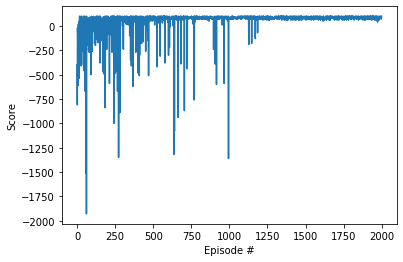

In [80]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = np.zeros([NUM_STATES], dtype=int)
        state[np.random.randint(0,NUM_STATES)] = 1
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
#             next_state, reward, done, _ = env.step(action)
            next_state, reward, done = xp_step(state, action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()